In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = r"C:\Users\kaust\Desktop\PG\SEM_2\DA Project\archive\train.csv"
train_data = pd.read_csv(train_path)
test_path = r"C:\Users\kaust\Desktop\PG\SEM_2\DA Project\archive\test.csv"
test_data = pd.read_csv(test_path)

In [3]:
train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

UniqueID = It is provided to every customer so its Unique and will always be different 

MobileNo_Avl_Flag = Whether person provided Mobile No. Doesn't tell us if loan will default

Current_pincode_ID = It is Customers address we don't need that for Prediction

Employee_code_ID = Employee ID is not required as it doesn't related with Loan_defualt

NO_OF_INQUIRIES = No. of Inquiries to loan doesn't help us to determine wheather loan will default or not

State_ID = It is where loan is availed and doesn't add much to prediction to loan default

branch_id = Branch ID isn't relevent to Data Processing

manufacturer_id = Manufacturer ID doesn't add much too data

supplier_id = Supplier ID doesn't add much too data

### So we drop these

In [5]:
train_data.drop(columns=['UniqueID','MobileNo_Avl_Flag','Current_pincode_ID','Employee_code_ID','NO.OF_INQUIRIES','State_ID','branch_id','manufacturer_id','supplier_id'], inplace=True)  
test_data.drop(columns=['UniqueID','MobileNo_Avl_Flag','Current_pincode_ID','Employee_code_ID','NO.OF_INQUIRIES','State_ID','branch_id','manufacturer_id','supplier_id'], inplace=True)  

In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
Aadhar_flag,233154.0,0.840320,3.663097e-01,0.00,1.00,1.0,1.00,1.000000e+00
PAN_flag,233154.0,0.075577,2.643201e-01,0.00,0.00,0.0,0.00,1.000000e+00
VoterID_flag,233154.0,0.144943,3.520439e-01,0.00,0.00,0.0,0.00,1.000000e+00
Driving_flag,233154.0,0.023242,1.506720e-01,0.00,0.00,0.0,0.00,1.000000e+00
Passport_flag,233154.0,0.002127,4.607421e-02,0.00,0.00,0.0,0.00,1.000000e+00
PERFORM_CNS.SCORE,233154.0,289.462994,3.383748e+02,0.00,0.00,0.0,678.00,8.900000e+02
PRI.NO.OF.ACCTS,233154.0,2.440636,5.217233e+00,0.00,0.00,0.0,3.00,4.530000e+02


In [7]:
train_data.columns = train_data.columns.str.replace('.','_')
test_data.columns = test_data.columns.str.replace('.','_')

In [8]:
train_data.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS                         0
PRI_CURRENT_BALANCE                       0
PRI_SANCTIONED_AMOUNT                     0
PRI_DISBURSED_AMOUNT                      0
SEC_NO_OF_ACCTS                           0
SEC_ACTIVE_ACCTS                          0
SEC_OVERDUE_ACCTS                         0
SEC_CURRENT_BALANCE             

## There are 7661 null values in the Employment Type attribute so we need to fix that by either imputation or dropping them
But first we need to deal with the categorical (Object) variables

In [9]:
#Now we have 2 Columns named "AVERAGE_ACCT_AGE" & "CREDIT_HISTORY_LENGTH".
#They have AplhNumeric Values Lets change them to Months

# Function to convert 'X yrs Y mon' format to total months
def change_col_month(col):
    try:
        col = str(col).strip()  # Ensure the value is a string and strip spaces
        
        if 'yrs' in col and 'mon' in col:  # Case: "5 yrs 6 mon"
            year, month = col.split()
            year = int(year.replace('yrs', '').strip())  # Extract year
            month = int(month.replace('mon', '').strip())  # Extract month
        
        elif 'yrs' in col:  # Case: Only years present (e.g., "4 yrs")
            year = int(col.replace('yrs', '').strip())
            month = 0  # No months given
        
        else:  # Case: Only months present (e.g., "8 mon")
            year = 0
            month = int(col.replace('mon', '').strip())
        
        return year * 12 + month  # Convert to total months
    
    except:
        return 0  # Return 0 if there's an unexpected error

# Function to apply transformation
def months_transformation(data):
    data['CREDIT_HISTORY_LENGTH'] = data['CREDIT_HISTORY_LENGTH'].astype(str).apply(change_col_month)
    data['AVERAGE_ACCT_AGE'] = data['AVERAGE_ACCT_AGE'].astype(str).apply(change_col_month)

# Apply transformation
months_transformation(train_data)
months_transformation(test_data)


## Converted year months alpha numeric data to number of months (Numeric)

In [10]:
train_data.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default
0,50578,58400,89.55,01-01-84,Salaried,03-08-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,31-07-85,Self employed,26-09-18,1,0,0,0,...,0,0,0,1991,0,0,1,23,23,1
2,53278,61360,89.63,24-08-85,Self employed,01-08-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,30-12-93,Self employed,26-10-18,1,0,0,0,...,0,0,0,31,0,0,0,8,15,1
4,52378,60300,88.39,09-12-77,Self employed,26-09-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Now we deal with PERFORM_CNS.SCORE.DESCRIPTION 

In [11]:

train_data.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

PERFORM_CNS_SCORE_DESCRIPTION
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the c

In [12]:
def transform_PERFORM_CNS_SCORE_DESCRIPTION(data):
   
    # Replacing all the values into a common group
    replace_map = {
        'C-Very Low Risk': 'Very Low Risk', 'A-Very Low Risk': 'Very Low Risk', 
        'D-Very Low Risk': 'Very Low Risk', 'B-Very Low Risk': 'Very Low Risk',
        'M-Very High Risk': 'Very High Risk', 'L-Very High Risk': 'Very High Risk',
        'F-Low Risk': 'Low Risk', 'E-Low Risk': 'Low Risk', 'G-Low Risk': 'Low Risk',
        'H-Medium Risk': 'Medium Risk', 'I-Medium Risk': 'Medium Risk',
        'J-High Risk': 'High Risk', 'K-High Risk': 'High Risk'
    }
    data['PERFORM_CNS_SCORE_DESCRIPTION'] = data['PERFORM_CNS_SCORE_DESCRIPTION'].replace(replace_map)

    # Mapping to numerical values
    risk_map = {
        'No Bureau History Available': -1, 'Not Scored: No Activity seen on the customer (Inactive)': -1,
        'Not Scored: Sufficient History Not Available': -1, 'Not Scored: No Updates available in last 36 months': -1,
        'Not Scored: Only a Guarantor': -1, 'Not Scored: More than 50 active Accounts found': -1,
        'Not Scored: Not Enough Info available on the customer': -1,
        'Very Low Risk': 4, 'Low Risk': 3, 'Medium Risk': 2, 'High Risk': 1, 'Very High Risk': 0
    }

    data['PERFORM_CNS_SCORE_DESCRIPTION'] = data['PERFORM_CNS_SCORE_DESCRIPTION'].map(risk_map)

# Call function
transform_PERFORM_CNS_SCORE_DESCRIPTION(train_data)
transform_PERFORM_CNS_SCORE_DESCRIPTION(test_data)

<Axes: xlabel='PERFORM_CNS_SCORE_DESCRIPTION', ylabel='count'>

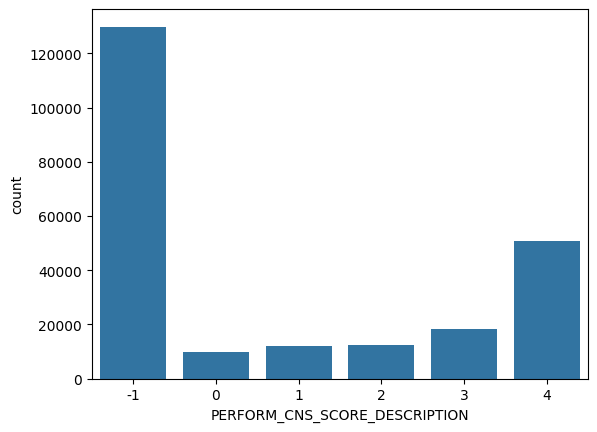

In [13]:
sns.countplot(x = train_data['PERFORM_CNS_SCORE_DESCRIPTION'])

## Transforming Primary and Secondary Accounts

In [14]:
train_data['NO_OF_ACCTS'] = train_data['PRI_NO_OF_ACCTS'] + train_data['SEC_NO_OF_ACCTS']
train_data['ACTIVE_ACCTS'] = train_data['PRI_ACTIVE_ACCTS'] + train_data['SEC_ACTIVE_ACCTS']
train_data['OVERDUE_ACCTS'] = train_data['PRI_OVERDUE_ACCTS'] + train_data['SEC_OVERDUE_ACCTS']
train_data['CURRENT_BALANCE'] = train_data['PRI_CURRENT_BALANCE'] + train_data['SEC_CURRENT_BALANCE']
train_data['SANCTIONED_AMOUNT'] = train_data['PRI_SANCTIONED_AMOUNT'] + train_data['SEC_SANCTIONED_AMOUNT']
train_data['DISBURSED_AMOUNT'] = train_data['PRI_DISBURSED_AMOUNT'] + train_data['SEC_DISBURSED_AMOUNT']
train_data['INSTAL_AMT'] = train_data['PRIMARY_INSTAL_AMT'] + train_data['SEC_SANCTIONED_AMOUNT']

test_data['NO_OF_ACCTS'] = test_data['PRI_NO_OF_ACCTS'] + test_data['SEC_NO_OF_ACCTS']
test_data['ACTIVE_ACCTS'] = test_data['PRI_ACTIVE_ACCTS'] + test_data['SEC_ACTIVE_ACCTS']
test_data['OVERDUE_ACCTS'] = test_data['PRI_OVERDUE_ACCTS'] + test_data['SEC_OVERDUE_ACCTS']
test_data['CURRENT_BALANCE'] = test_data['PRI_CURRENT_BALANCE'] + test_data['SEC_CURRENT_BALANCE']
test_data['SANCTIONED_AMOUNT'] = test_data['PRI_SANCTIONED_AMOUNT'] + test_data['SEC_SANCTIONED_AMOUNT']
test_data['DISBURSED_AMOUNT'] = test_data['PRI_DISBURSED_AMOUNT'] + test_data['SEC_DISBURSED_AMOUNT']
test_data['INSTAL_AMT'] = test_data['PRIMARY_INSTAL_AMT'] + test_data['SEC_SANCTIONED_AMOUNT']

# List of original columns to drop
original_columns = [
    'PRI_NO_OF_ACCTS', 'SEC_NO_OF_ACCTS', 
    'PRI_ACTIVE_ACCTS', 'SEC_ACTIVE_ACCTS', 
    'PRI_OVERDUE_ACCTS', 'SEC_OVERDUE_ACCTS', 
    'PRI_CURRENT_BALANCE', 'SEC_CURRENT_BALANCE', 
    'PRI_SANCTIONED_AMOUNT', 'SEC_SANCTIONED_AMOUNT', 
    'PRI_DISBURSED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 
    'PRIMARY_INSTAL_AMT'
]

# Dropping the original columns from both datasets
train_data.drop(columns=original_columns, inplace=True, errors='ignore')
test_data.drop(columns=original_columns, inplace=True, errors='ignore')

In [15]:
new_columns = ['NO_OF_ACCTS', 'ACTIVE_ACCTS', 'OVERDUE_ACCTS', 'CURRENT_BALANCE',
       'SANCTIONED_AMOUNT', 'DISBURSED_AMOUNT', 'INSTAL_AMT']

for i in new_columns:
    print(i,":", train_data[i].nunique())
    print("")

NO_OF_ACCTS : 108

ACTIVE_ACCTS : 41

OVERDUE_ACCTS : 22

CURRENT_BALANCE : 72483

SANCTIONED_AMOUNT : 45367

DISBURSED_AMOUNT : 48958

INSTAL_AMT : 30049



<Axes: ylabel='ACTIVE_ACCTS'>

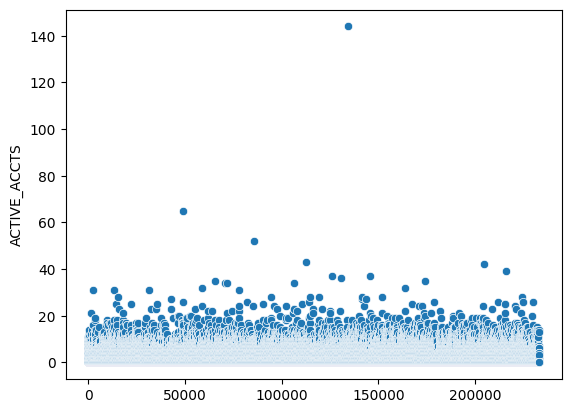

In [16]:
sns.scatterplot(data=train_data['ACTIVE_ACCTS'])

<Axes: ylabel='NO_OF_ACCTS'>

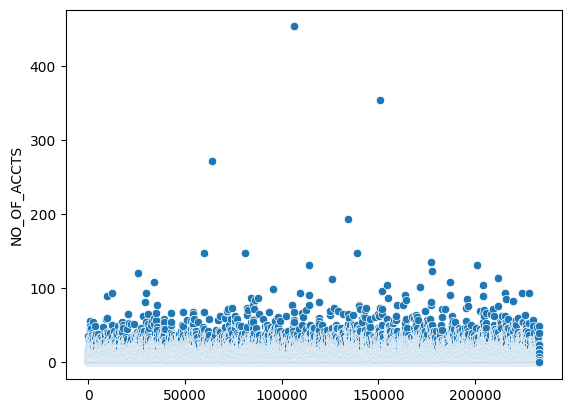

In [17]:
sns.scatterplot(data=train_data['NO_OF_ACCTS'])

<Axes: ylabel='OVERDUE_ACCTS'>

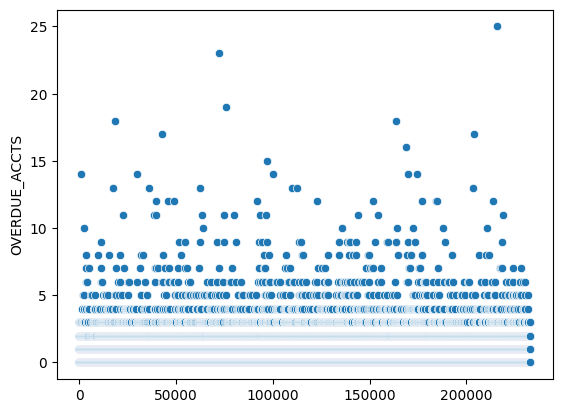

In [18]:
sns.scatterplot(data=train_data['OVERDUE_ACCTS'])

<Axes: ylabel='CURRENT_BALANCE'>

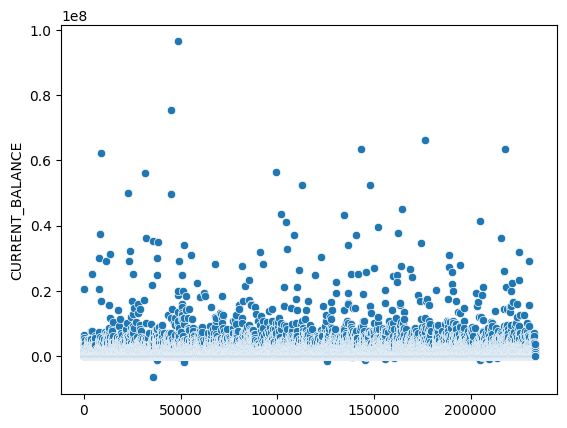

In [19]:
sns.scatterplot(data = train_data['CURRENT_BALANCE'])

In [20]:
def mode_impute_outlier(data):
    # Handle ACTIVE_ACCTS outliers
    li = list(data['ACTIVE_ACCTS'].sort_values()[-3:].index)
    mode_value = data.drop(li)['ACTIVE_ACCTS'].mode().iloc[0]  # Get the first mode value
    data.loc[li, 'ACTIVE_ACCTS'] = mode_value  # Impute using .loc
    
    # Handle NO_OF_ACCTS outliers
    li = list(data['NO_OF_ACCTS'].sort_values()[-4:].index)
    mode_value = data.drop(li)['NO_OF_ACCTS'].mode().iloc[0]  # Get the first mode value
    data.loc[li, 'NO_OF_ACCTS'] = mode_value  # Impute using .loc
    
    # Handle OVERDUE_ACCTS outliers
    li = list(data['OVERDUE_ACCTS'].sort_values()[-10:].index)
    mode_value = data.drop(li)['OVERDUE_ACCTS'].mode().iloc[0]  # Get the first mode value
    data.loc[li, 'OVERDUE_ACCTS'] = mode_value  # Impute using .loc
    
    # Handle CURRENT_BALANCE outliers
    li = list(data['CURRENT_BALANCE'].sort_values()[-15:].index)
    mode_value = data.drop(li)['CURRENT_BALANCE'].mode().iloc[0]  # Get the first mode value
    data.loc[li, 'CURRENT_BALANCE'] = mode_value  # Impute using .loc

# Apply function
mode_impute_outlier(train_data)
train_data.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT
0,50578,58400,89.55,01-01-84,Salaried,03-08-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,31-07-85,Self employed,26-09-18,1,0,0,0,...,23,23,1,1,1,1,27600,50200,50200,1991
2,53278,61360,89.63,24-08-85,Self employed,01-08-18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,30-12-93,Self employed,26-10-18,1,0,0,0,...,8,15,1,3,0,0,0,0,0,31
4,52378,60300,88.39,09-12-77,Self employed,26-09-18,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## lets convert the DOB and Disbursement Date to age

In [21]:
train_data.Date_of_Birth.min(), train_data.Date_of_Birth.max()

('01-01-00', '31-12-99')

In [22]:
def age(dob):
    yr = int(dob[-2:])
    if yr >=0 and yr < 20:
        return yr + 2000
    else:
         return yr + 1900


def calculate_age(data):
    data['Date_of_Birth'] = data['Date_of_Birth'].apply(age)
    data['DisbursalDate'] = data['DisbursalDate'].apply(age)
    # Age of applicant when he/she applied for Loan
    data['Age'] = data['DisbursalDate'] - data['Date_of_Birth']
    
calculate_age(train_data)
calculate_age(test_data)

date_columns = [
    'Date_of_Birth', 'DisbursalDate']
train_data.drop(columns=date_columns, inplace=True, errors='ignore')
test_data.drop(columns=date_columns, inplace=True, errors='ignore')

In [23]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
Aadhar_flag,233154.0,0.840320,3.663097e-01,0.00,1.00,1.0,1.00,1.000000e+00
PAN_flag,233154.0,0.075577,2.643201e-01,0.00,0.00,0.0,0.00,1.000000e+00
VoterID_flag,233154.0,0.144943,3.520439e-01,0.00,0.00,0.0,0.00,1.000000e+00
Driving_flag,233154.0,0.023242,1.506720e-01,0.00,0.00,0.0,0.00,1.000000e+00
Passport_flag,233154.0,0.002127,4.607421e-02,0.00,0.00,0.0,0.00,1.000000e+00
PERFORM_CNS_SCORE,233154.0,289.462994,3.383748e+02,0.00,0.00,0.0,678.00,8.900000e+02
PERFORM_CNS_SCORE_DESCRIPTION,233154.0,0.707078,2.123337e+00,-1.00,-1.00,-1.0,3.00,4.000000e+00


## Now lets deal with the missing value

<Axes: xlabel='Employment_Type', ylabel='count'>

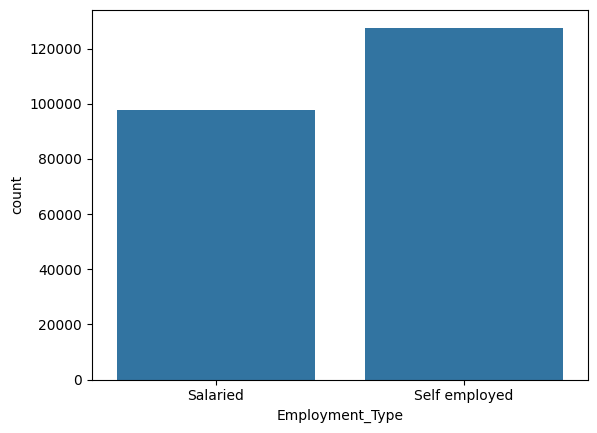

In [24]:
sns.countplot(x = train_data['Employment_Type'])

In [25]:
train_data['Employment_Type'] = train_data['Employment_Type'].map({'Salaried': 1, 'Self employed': 0})
test_data['Employment_Type'] = test_data['Employment_Type'].map({'Salaried': 1, 'Self employed': 0})
train_data['Employment_Type'].isnull().sum()

np.int64(7661)

In [26]:
correlation_values = train_data.corr()['Employment_Type'].dropna().sort_values(ascending=False)
print(correlation_values)

Employment_Type                        1.000000
ltv                                    0.107451
Aadhar_flag                            0.087472
PERFORM_CNS_SCORE_DESCRIPTION          0.050634
PERFORM_CNS_SCORE                      0.044901
disbursed_amount                       0.020152
ACTIVE_ACCTS                           0.009703
NEW_ACCTS_IN_LAST_SIX_MONTHS           0.009426
CREDIT_HISTORY_LENGTH                  0.008913
SEC_INSTAL_AMT                         0.005387
Passport_flag                          0.005197
AVERAGE_ACCT_AGE                       0.000232
Driving_flag                          -0.002521
PAN_flag                              -0.003008
NO_OF_ACCTS                           -0.004971
INSTAL_AMT                            -0.006895
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS   -0.007327
SANCTIONED_AMOUNT                     -0.012065
DISBURSED_AMOUNT                      -0.012313
CURRENT_BALANCE                       -0.020165
OVERDUE_ACCTS                         -0

## There is no good corelation between Employment type and any other column so we just impute missing values with 1

In [27]:
train_data['Employment_Type'] = train_data['Employment_Type'].fillna(1)
test_data['Employment_Type'] = test_data['Employment_Type'].fillna(1)

In [28]:
train_data.isnull().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
Employment_Type                        0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
SEC_INSTAL_AMT                         0
NEW_ACCTS_IN_LAST_SIX_MONTHS           0
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    0
AVERAGE_ACCT_AGE                       0
CREDIT_HISTORY_LENGTH                  0
loan_default                           0
NO_OF_ACCTS                            0
ACTIVE_ACCTS                           0
OVERDUE_ACCTS                          0
CURRENT_BALANCE                        0
SANCTIONED_AMOUNT                      0
DISBURSED_AMOUNT                       0
INSTAL_AMT                             0
Age             

## Data is now clean and could be used for model training

In [29]:
X = train_data.drop(['loan_default'], axis=1)
y = train_data['loan_default']

X.head()

,disbursed_amount,asset_cost,ltv,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,...,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT,Age
0,50578,58400,89.55,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
1,47145,65550,73.23,0.0,1,0,0,0,0,598,...,23,23,1,1,1,27600,50200,50200,1991,33
2,53278,61360,89.63,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
3,57513,66113,88.48,0.0,1,0,0,0,0,305,...,8,15,3,0,0,0,0,0,31,25
4,52378,60300,88.39,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41


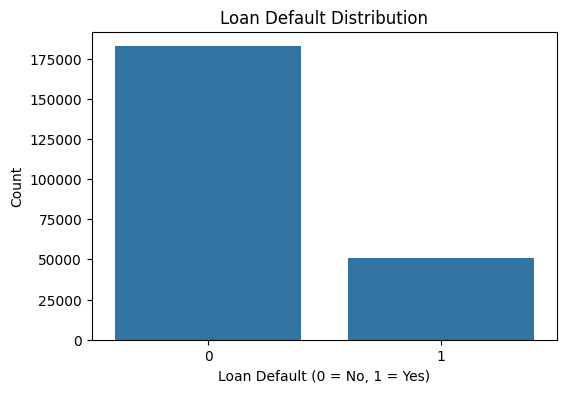

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x=train_data['loan_default'])

# Add labels and title
plt.xlabel('Loan Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Loan Default Distribution')

plt.show()

## The standard where data imbalance can be ignore in Binary class data is 65-35. In our case it is 72-28, so we cant't ignore it and have to deal with it using SMOTE

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_tf, y_tf = smote.fit_resample(X, y)
X_tf.shape, y_tf.shape

((365086, 24), (365086,))

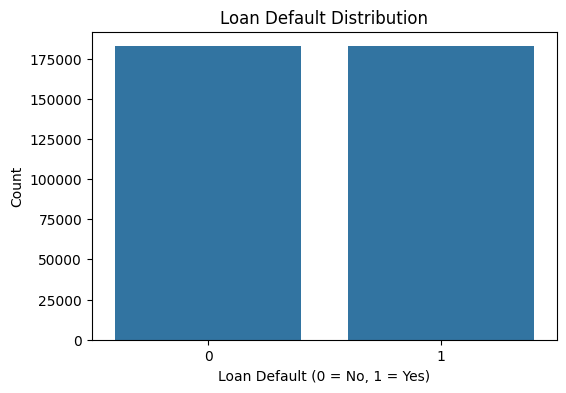

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_tf)

# Add labels and title
plt.xlabel('Loan Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Loan Default Distribution')

plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_tf, y_tf, test_size=0.2, random_state=42, stratify=y_tf)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.6696
Confusion Matrix:
 [[25424 11085]
 [13038 23471]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68     36509
           1       0.68      0.64      0.66     36509

    accuracy                           0.67     73018
   macro avg       0.67      0.67      0.67     73018
weighted avg       0.67      0.67      0.67     73018



In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

# Select features from resampled dataset (X_tf)
X_vif = X_tf.copy()  # Ensure you use the resampled dataset
X_vif = add_constant(X_vif)  # Add intercept

# Compute VIF for each feature
vif_values = [variance_inflation_factor(X_vif.to_numpy(), i) for i in range(X_vif.shape[1])]

# Print feature names along with VIF scores
vif_df = pd.DataFrame({'Feature': X_vif.columns, 'VIF': vif_values})
print(vif_df.sort_values(by="VIF", ascending=False))


                                Feature         VIF
22                     DISBURSED_AMOUNT  772.083811
21                    SANCTIONED_AMOUNT  771.542308
0                                 const  655.557008
1                      disbursed_amount   31.341342
10                    PERFORM_CNS_SCORE   31.316043
2                            asset_cost   30.949645
11        PERFORM_CNS_SCORE_DESCRIPTION   28.482963
3                                   ltv   14.618565
16                CREDIT_HISTORY_LENGTH    5.245693
18                         ACTIVE_ACCTS    4.915584
15                     AVERAGE_ACCT_AGE    4.413112
17                          NO_OF_ACCTS    2.813126
13         NEW_ACCTS_IN_LAST_SIX_MONTHS    2.330485
19                        OVERDUE_ACCTS    1.732828
5                           Aadhar_flag    1.729491
7                          VoterID_flag    1.680628
20                      CURRENT_BALANCE    1.492468
14  DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    1.430088
24          

In [35]:
import statsmodels.api as sm

import statsmodels.discrete.discrete_model as sml
X=X_tf
#X=df[['gpa','work_experience']]
#X = add_constant(X)
#X=df[['work_experience']]
logit = sml.Logit(y_tf, X_tf).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.580565
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:               365086
Model:                          Logit   Df Residuals:                   365062
Method:                           MLE   Df Model:                           23
Date:                Tue, 11 Mar 2025   Pseudo R-squ.:                  0.1624
Time:                        10:57:47   Log-Likelihood:            -2.1196e+05
converged:                       True   LL-Null:                   -2.5306e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
disbursed_amount                    -1.585e-07   8.26e-07 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tf, y_tf, test_size=0.2, random_state=42, stratify=y_tf)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


C:\Users\kaust\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7659
Confusion Matrix:
 [[34361  2148]
 [14942 21567]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.80     36509
           1       0.91      0.59      0.72     36509

    accuracy                           0.77     73018
   macro avg       0.80      0.77      0.76     73018
weighted avg       0.80      0.77      0.76     73018



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tf, y_tf, test_size=0.2, random_state=42, stratify=y_tf)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy: 0.7381
Confusion Matrix:
 [[33808  2701]
 [16420 20089]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.93      0.78     36509
           1       0.88      0.55      0.68     36509

    accuracy                           0.74     73018
   macro avg       0.78      0.74      0.73     73018
weighted avg       0.78      0.74      0.73     73018



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tf, y_tf, test_size=0.2, random_state=42, stratify=y_tf)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators = 1500, n_jobs=-1, max_depth=15, 
                             min_samples_split=5, min_samples_leaf=3)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy: 0.7629
Confusion Matrix:
 [[33092  3417]
 [13892 22617]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79     36509
           1       0.87      0.62      0.72     36509

    accuracy                           0.76     73018
   macro avg       0.79      0.76      0.76     73018
weighted avg       0.79      0.76      0.76     73018

